In [1]:
import mysql.connector

In [2]:
import pandas as pd

In [3]:
connection = mysql.connector.connect(
    host='localhost',
    database='music_production',
    user='root',
    password='akatsuki652@'
)

In [4]:
cursor = connection.cursor()

In [6]:
cursor.execute('SELECT * FROM artists')

In [8]:
artists = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])

In [9]:
cursor.execute('SELECT * FROM albums')
albums = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])

In [10]:
cursor.execute('SELECT * FROM tracks')
tracks = pd.DataFrame(cursor.fetchall(), columns=[col[0] for col in cursor.description])

In [12]:
print(artists.head(15))

    artist_id artist_name     country     genre
0           1    Artist 1   Country 1   Genre 1
1           2    Artist 2   Country 2   Genre 2
2           3    Artist 3   Country 3   Genre 3
3           4    Artist 4   Country 4   Genre 4
4           5    Artist 5   Country 5   Genre 5
5           6    Artist 6   Country 6   Genre 6
6           7    Artist 7   Country 7   Genre 7
7           8    Artist 8   Country 8   Genre 8
8           9    Artist 9   Country 9   Genre 9
9          10   Artist 10  Country 10  Genre 10
10         11   Artist 11  Country 11  Genre 11
11         12   Artist 12  Country 12  Genre 12
12         13   Artist 13  Country 13  Genre 13
13         14   Artist 14  Country 14  Genre 14
14         15   Artist 15  Country 15  Genre 15


In [13]:
print(albums.head(15))

    album_id album_title  release_year  artist_id
0          1     Album 1          2020          1
1          2     Album 2          2018          2
2          3     Album 3          2019          3
3          4     Album 4          2021          4
4          5     Album 5          2020          5
5          6     Album 6          2017          6
6          7     Album 7          2016          7
7          8     Album 8          2019          8
8          9     Album 9          2022          9
9         10    Album 10          2021         10
10        11    Album 11          2018         11
11        12    Album 12          2020         12
12        13    Album 13          2017         13
13        14    Album 14          2016         14
14        15    Album 15          2023         15


In [14]:
print(tracks.head(15))

    track_id track_title        duration  album_id
0          1     Track 1 0 days 00:03:30         1
1          2     Track 2 0 days 00:04:15         2
2          3     Track 3 0 days 00:03:50         3
3          4     Track 4 0 days 00:05:00         4
4          5     Track 5 0 days 00:04:20         5
5          6     Track 6 0 days 00:03:45         6
6          7     Track 7 0 days 00:04:10         7
7          8     Track 8 0 days 00:03:20         8
8          9     Track 9 0 days 00:04:30         9
9         10    Track 10 0 days 00:03:55        10
10        11    Track 11 0 days 00:04:05        11
11        12    Track 12 0 days 00:03:40        12
12        13    Track 13 0 days 00:04:25        13
13        14    Track 14 0 days 00:03:15        14
14        15    Track 15 0 days 00:04:00        15


In [15]:
import matplotlib.pyplot as plt

In [16]:
genre_counts = artists['genre'].value_counts()

In [17]:
genres = genre_counts.index.tolist()
counts = genre_counts.tolist()

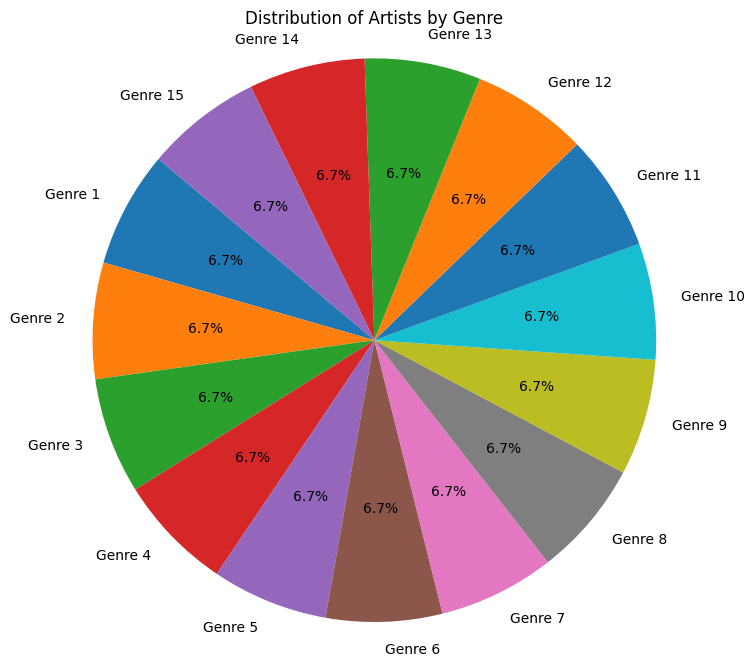

In [18]:
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=genres, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Artists by Genre')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [22]:
artist_counts = artists['artist_name'].value_counts()

In [23]:
# Convert the Series to a DataFrame for better visualization
df_artist_counts = artist_counts.reset_index()
df_artist_counts.columns = ['artist_name', 'count']

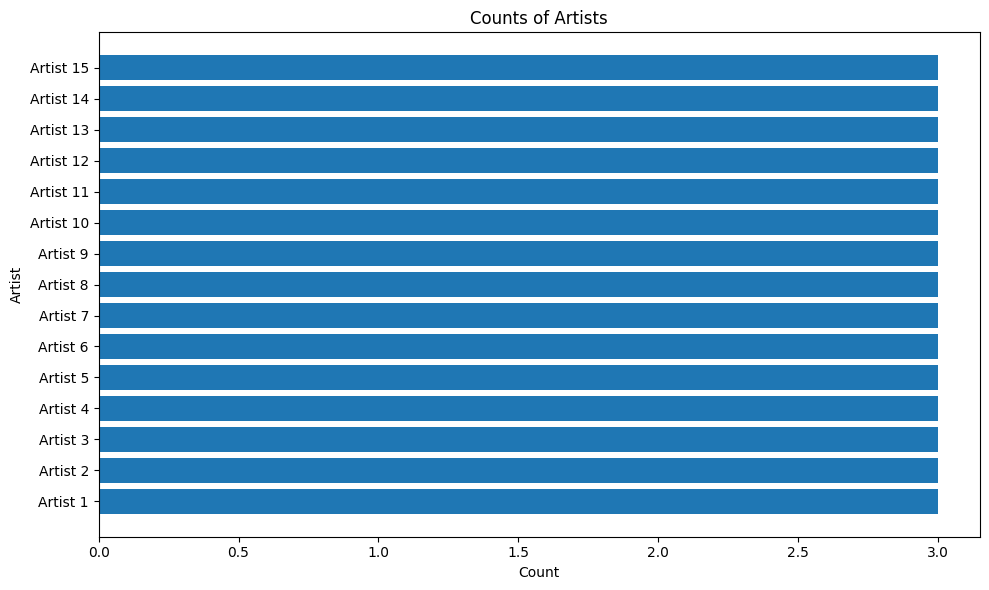

In [24]:
# Plotting the counts of artists
plt.figure(figsize=(10, 6))
plt.barh(df_artist_counts['artist_name'], df_artist_counts['count'])
plt.xlabel('Count')
plt.ylabel('Artist')
plt.title('Counts of Artists')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

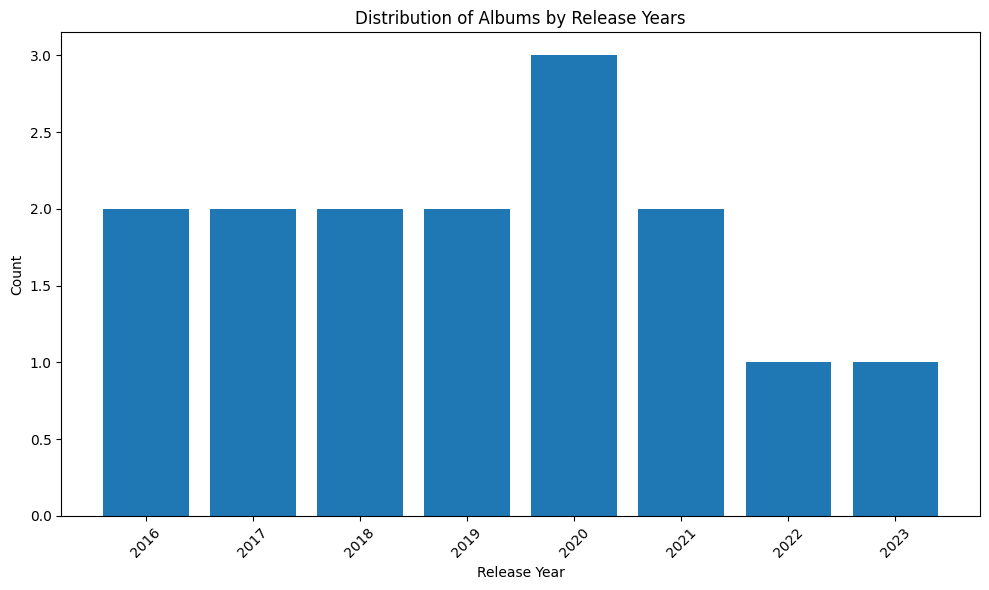

In [26]:


# Assuming 'albums' DataFrame contains data from the 'albums' table
# Grouping albums by release year and counting the number of albums in each year
release_year_counts = albums['release_year'].value_counts()

# Convert the Series to a DataFrame for better visualization
df_release_year_counts = release_year_counts.reset_index()
df_release_year_counts.columns = ['release_year', 'count']

# Sort the DataFrame by release year
df_release_year_counts = df_release_year_counts.sort_values(by='release_year')

# Plotting the distribution of albums by release years
plt.figure(figsize=(10, 6))
plt.bar(df_release_year_counts['release_year'], df_release_year_counts['count'])
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.title('Distribution of Albums by Release Years')
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


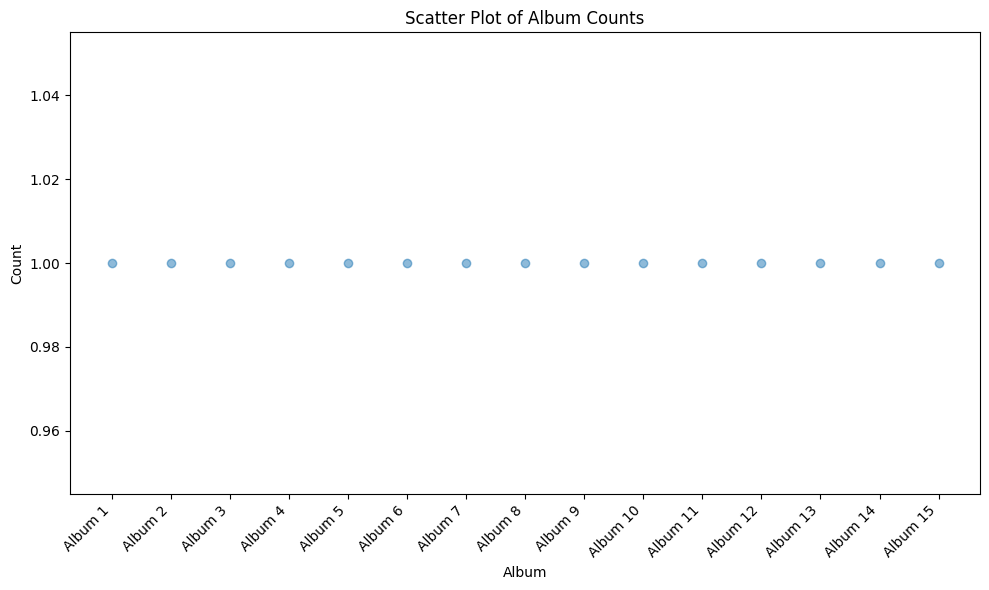

In [36]:


# Assuming 'albums' DataFrame contains data from the 'albums' table
# Assuming the album titles are stored in a column named 'album_title'
# Assuming 'albumns' is a typo and meant to be 'albums'

# Calculate the counts of each album
album_counts = albums['album_title'].value_counts()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(album_counts.index, album_counts.values, alpha=0.5)
plt.xlabel('Album')
plt.ylabel('Count')
plt.title('Scatter Plot of Album Counts')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


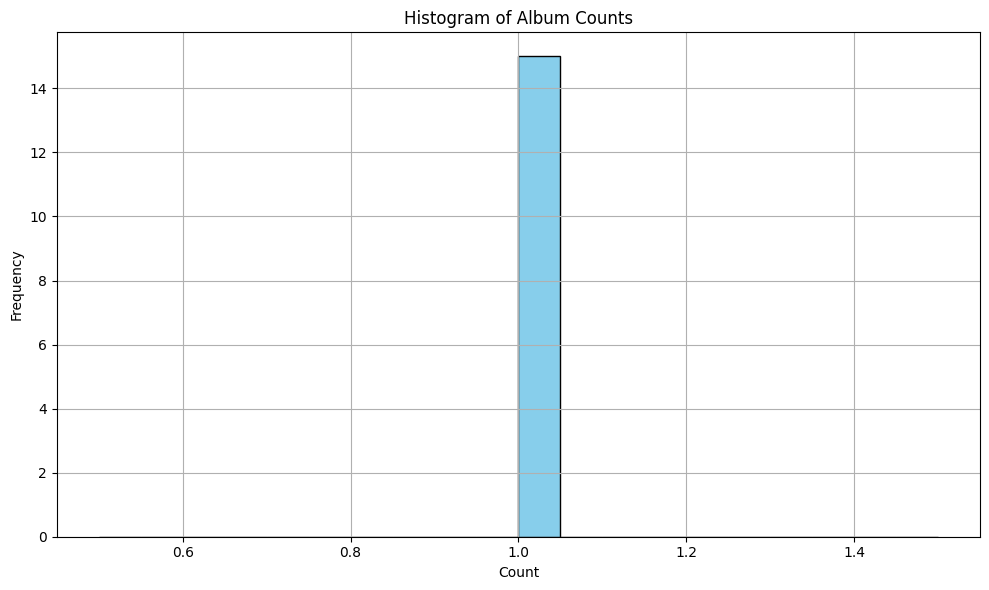

In [37]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
album_counts.hist(bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Count')
plt.ylabel('Frequency')
plt.title('Histogram of Album Counts')
plt.grid(True)
plt.tight_layout()
plt.show()

In [51]:
print(tracks.columns)

Index(['track_id', 'track_title', 'duration', 'album_id'], dtype='object')


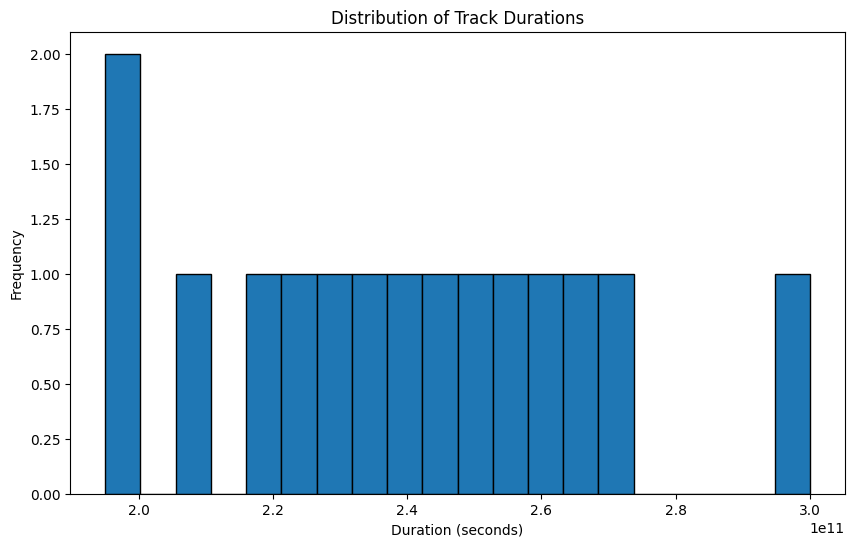

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'tracks' DataFrame contains data from the 'tracks' table
# Assuming the 'duration' column contains the duration of tracks in seconds

# Convert 'duration' column to numerical type
tracks['duration'] = pd.to_numeric(tracks['duration'], errors='coerce')

# Plot the converted 'duration' column
plt.figure(figsize=(10, 6))
plt.hist(tracks['duration'], bins=20, edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Track Durations')
plt.show()

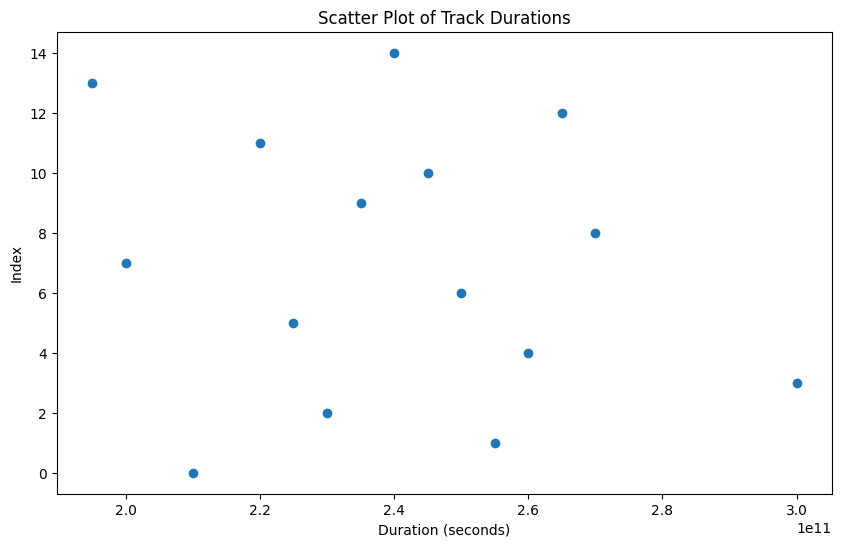

In [53]:
import matplotlib.pyplot as plt

# Assuming 'tracks' DataFrame contains data from the 'tracks' table
# Assuming the 'duration' column contains the duration of tracks in seconds

# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(tracks['duration'], tracks.index)
plt.xlabel('Duration (seconds)')
plt.ylabel('Index')
plt.title('Scatter Plot of Track Durations')
plt.show()


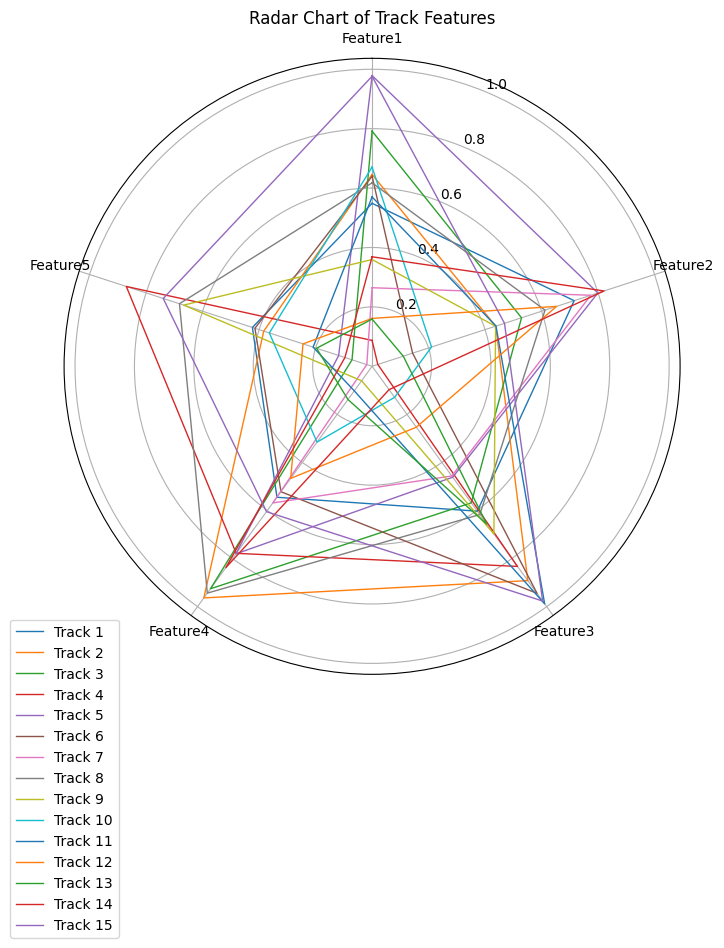

In [54]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'tracks' DataFrame contains additional features for each track
# For demonstration purposes, let's create some random data
num_features = 5
num_tracks = len(tracks)
feature_names = ['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5']

# Generate random data for each feature for each track
np.random.seed(0)
track_features = np.random.rand(num_tracks, num_features)  # Random values between 0 and 1

# Plotting the radar chart for each track
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i in range(num_tracks):
    values = track_features[i].tolist()
    values += values[:1]  # Close the loop
    angles = np.linspace(0, 2 * np.pi, len(feature_names), endpoint=False).tolist()
    angles += angles[:1]  # Close the loop
    ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Track {i+1}')

ax.set_theta_offset(np.pi / 2)  # Rotate the plot such that the first axis is at the top
ax.set_theta_direction(-1)  # Rotate clockwise
plt.xticks(angles[:-1], feature_names)  # Set the labels for each axis
ax.yaxis.grid(True)
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Radar Chart of Track Features')
plt.show()


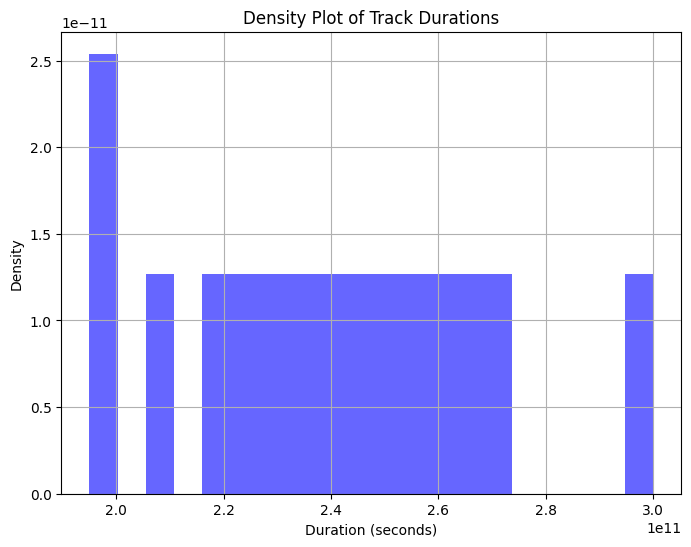

In [55]:
import matplotlib.pyplot as plt

# Assuming 'tracks' DataFrame contains the data
# 'duration' column represents the track duration

# Plotting the density plot
plt.figure(figsize=(8, 6))
plt.hist(tracks['duration'], bins=20, density=True, alpha=0.6, color='b')
plt.title('Density Plot of Track Durations')
plt.xlabel('Duration (seconds)')
plt.ylabel('Density')
plt.grid(True)
plt.show()


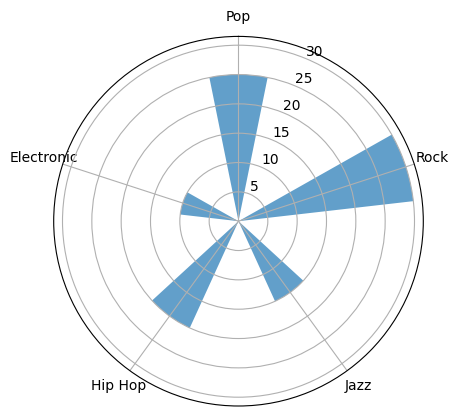

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data (replace this with your actual data)
categories = ['Pop', 'Rock', 'Jazz', 'Hip Hop', 'Electronic']
artist_counts = [25, 30, 15, 20, 10]  # Counts of artists in each category

# Create a figure and axis
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})

# Convert category counts to radians
theta = np.linspace(0, 2 * np.pi, len(categories), endpoint=False)

# Plot the radial histogram
bars = ax.bar(theta, artist_counts, width=0.4, alpha=0.7)

# Customize the plot
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks(theta)
ax.set_xticklabels(categories)

# Show the plot
plt.show()


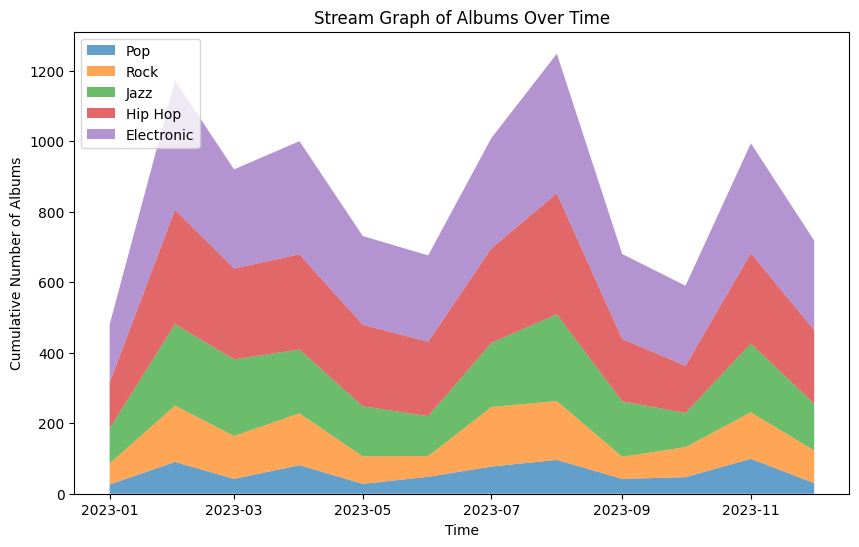

In [58]:

import numpy as np
import pandas as pd

# Sample data (replace this with your actual data)
time_periods = pd.date_range(start='2023-01-01', end='2023-12-31', freq='MS')  # Updated frequency to 'MS'
categories = ['Pop', 'Rock', 'Jazz', 'Hip Hop', 'Electronic']
albums_data = np.random.randint(10, 100, size=(len(time_periods), len(categories)))

# Calculate cumulative sum of albums in each category
albums_cumulative = np.cumsum(albums_data, axis=1)

# Plot the stream graph
plt.figure(figsize=(10, 6))
plt.stackplot(time_periods, albums_cumulative.T, labels=categories, alpha=0.7)
plt.title('Stream Graph of Albums Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Number of Albums')
plt.legend(loc='upper left')
plt.show()
